In [1]:
from csv import DictReader

with open('_results/fp_cu_results.csv', 'r') as csv_file:
    reader = DictReader(csv_file)
    rows = [r for r in reader]
csv_file.close()

selected_compounds = []
for r in rows:
    if r['Name'] == '1,3-dimethyl-5-cyclohexoxy cyclohexane':
        selected_compounds.append(r)
    elif r['Name'] == '1-ethyl-3-cyclohexoxy cyclohexane':
        selected_compounds.append(r)
    elif r['Name'] == '1-ethyl-4-cyclohexoxy cyclohexane':
        selected_compounds.append(r)
    elif r['Name'] == '1-cyclohexyloxy-2-methyl-cyclohexane':
        selected_compounds.append(r)
    elif r['Name'] == '1,1\'-oxybiscyclohexane':
        selected_compounds.append(r)
    else:
        continue

In [2]:
diesel = {
    'CN': 45.0,
    'YSI': 242.0,
    'KV': 4.0,
    'CP': 5.0,
    'LHV': 42.6
}

In [3]:
from ecnet.blends import cetane_number, yield_sooting_index, kinematic_viscosity,\
    cloud_point, lower_heating_value
from ecnet.blends import linear_blend_err, exponential_blend_err, kv_error
import numpy as np

curves = {
    'CN': [],
    'YSI': [],
    'KV': [],
    'CP': [],
    'LHV': []
}

for comp in selected_compounds:
    _cn_curve = []
    _cn_d = diesel['CN']
    _cn_add = float(comp['CN'])
    _cn_err = 5.1332
    for i in np.arange(0.0, 0.2, 0.01):
        _ERR = linear_blend_err([_cn_err, 0.0], [i, 1.0 - i])
        _cn_curve.append((cetane_number([_cn_add, _cn_d], [i, 1.0 - i]), i, _ERR))
    curves['CN'].append(_cn_curve)
    
    _ysi_curve = []
    _ysi_d = diesel['YSI']
    _ysi_add = float(comp['YSI'])
    _ysi_err = 6.6500
    for i in np.arange(0.0, 0.2, 0.01):
        _ERR = linear_blend_err([_ysi_err, 0.0], [i, 1.0 - i])
        _ysi_curve.append((yield_sooting_index([_ysi_add, _ysi_d], [i, 1.0 - i]), i, _ERR))
    curves['YSI'].append(_ysi_curve)
    
    _kv_curve = []
    _kv_d = diesel['KV']
    _kv_add = float(comp['KV'])
    _kv_err = 0.0765
    for i in np.arange(0.0, 0.2, 0.01):
        _ERR = kv_error([_kv_add, _kv_d], [_kv_err, 0.0], [i, 1.0 - i])
        _kv_curve.append((kinematic_viscosity([_kv_add, _kv_d], [i, 1.0 - i]), i, _ERR))
    curves['KV'].append(_kv_curve)
    
    _cp_curve = []
    _cp_d = diesel['CP']
    _cp_add = float(comp['CP'])
    # quick check for divide by zero error fix
    _cp_err = 1.1294
    for i in np.arange(0.0, 0.2, 0.01):
        # CP equation, form f = aA^b
        __val = cloud_point([_cp_add, _cp_d], [i, 1.0 - i])
        if _cp_add == 0.0:
            _ERR = 0.0
        else:
            _ERR = exponential_blend_err([_cp_add, _cp_d], __val, [_cp_err, 0.0],
                                         [i, 1.0 - i], 1.0, 1.0)
        _cp_curve.append((__val, i, _ERR))
    curves['CP'].append(_cp_curve)
    
    _lhv_curve = []
    _lhv_d = diesel['LHV']
    _lhv_add = float(comp['LHV'])
    _lhv_err = 0.7689
    for i in np.arange(0.0, 0.2, 0.01):
        # diesel error of 1e-8 used to prevent divide by zero error
        _ERR = linear_blend_err([_lhv_err, 1e-8], [i, 1.0 - i])
        _lhv_curve.append((lower_heating_value([_lhv_add, _lhv_d], [i, 1.0 - i]), i, _ERR))
    curves['LHV'].append(_lhv_curve)

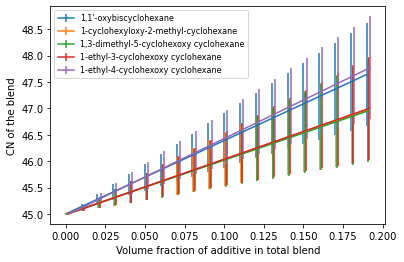

In [4]:
from matplotlib import pyplot as plt

plt.clf()
plt.xlabel('Volume fraction of additive in total blend')
plt.ylabel('CN of the blend')
for idx, curve in enumerate(curves['CN']):
    plt.errorbar([c[1] + (idx * 0.0005) for c in curve], [c[0] for c in curve],
                 label=selected_compounds[idx]['Name'], yerr=[c[2] for c in curve])
plt.legend(loc='upper left', prop={'size': 8})
plt.show()

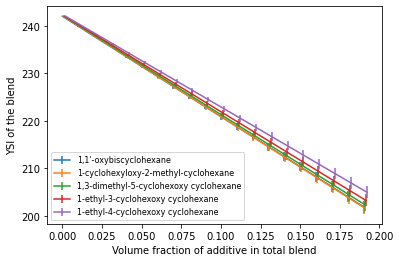

In [5]:
plt.clf()
plt.xlabel('Volume fraction of additive in total blend')
plt.ylabel('YSI of the blend')
for idx, curve in enumerate(curves['YSI']):
    plt.errorbar([c[1] + (idx * 0.0005) for c in curve], [c[0] for c in curve],
                 label=selected_compounds[idx]['Name'], yerr=[c[2] for c in curve])
plt.legend(loc='lower left', prop={'size': 8})
plt.show()

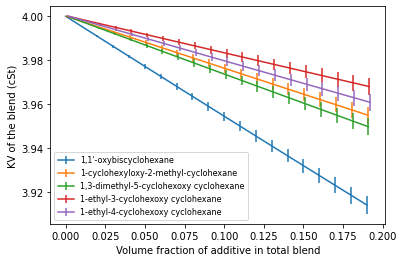

In [6]:
plt.clf()
plt.xlabel('Volume fraction of additive in total blend')
plt.ylabel('KV of the blend (cSt)')
for idx, curve in enumerate(curves['KV']):
    plt.errorbar([c[1] + (idx * 0.0005) for c in curve], [c[0] for c in curve],
                 label=selected_compounds[idx]['Name'], yerr=[c[2] for c in curve])
plt.legend(loc='lower left', prop={'size': 8})
plt.show()

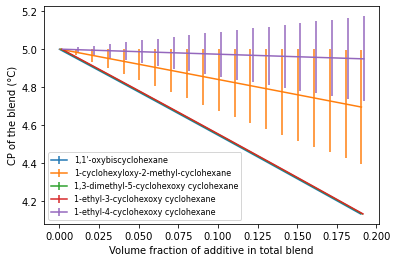

In [7]:
plt.clf()
plt.xlabel('Volume fraction of additive in total blend')
plt.ylabel('CP of the blend (°C)')
for idx, curve in enumerate(curves['CP']):
    # slight offset for better viewing
    plt.errorbar([c[1] + (idx * 0.0005) for c in curve], [c[0] for c in curve],
                 label=selected_compounds[idx]['Name'], yerr=[c[2] for c in curve])
plt.legend(loc='lower left', prop={'size': 8})
plt.show()

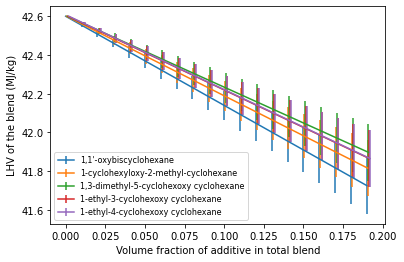

In [8]:
plt.clf()
plt.xlabel('Volume fraction of additive in total blend')
plt.ylabel('LHV of the blend (MJ/kg)')
for idx, curve in enumerate(curves['LHV']):
    plt.errorbar([c[1] + (idx * 0.0005) for c in curve], [c[0] for c in curve],
                 label=selected_compounds[idx]['Name'], yerr=[c[2] for c in curve])
plt.legend(loc='lower left', prop={'size': 8})
plt.show()